In [1]:
import math
import meep as mp
from meep import mpb

In [4]:
num_bands = 8
k_points = [mp.Vector3(),               # Gamma
              mp.Vector3(y=0.5),          # M
              mp.Vector3(-1 / 3, 1 / 3),  # K
              mp.Vector3()]               # Gamma

k_points = mp.interpolate(4, k_points)
geometry = [mp.Cylinder(0.3, material=mp.Medium(epsilon=1))]
geometry_lattice = mp.Lattice(size=mp.Vector3(1, 1),
                                 basis1=mp.Vector3(math.sqrt(3) / 2, 0.5),
                                 basis2=mp.Vector3(math.sqrt(3) / 2, -0.5))
default_material=mp.Medium(epsilon=10.4329)
resolution = 32

In [5]:
ms = mpb.ModeSolver(num_bands=num_bands,
                    k_points=k_points,
                    geometry=geometry,
                    geometry_lattice=geometry_lattice,
                    resolution=resolution,
                    default_material=default_material)

In [6]:
ms.run_tm()

Initializing eigensolver data
Computing 8 bands with 1e-07 tolerance
Working in 2 dimensions.
Grid size is 32 x 32 x 1.
Solving for 8 bands at a time.
Creating Maxwell data...
Mesh size is 3.
Lattice vectors:
     (0.866025, 0.5, 0)
     (0.866025, -0.5, 0)
     (0, 0, 1)
Cell volume = 0.866025
Reciprocal lattice vectors (/ 2 pi):
     (0.57735, 1, -0)
     (0.57735, -1, 0)
     (-0, 0, 1)
Geometric objects:
     cylinder, center = (0,0,0)
          radius 0.3, height 1e+20, axis (0, 0, 1)
Geometric object tree has depth 1 and 1 object nodes (vs. 1 actual objects)
Initializing epsilon function...
Allocating fields...
Solving for band polarization: tm.
Initializing fields to random numbers...
16 k-points
  Vector3<0.0, 0.0, 0.0>
  Vector3<0.0, 0.1, 0.0>
  Vector3<0.0, 0.2, 0.0>
  Vector3<0.0, 0.30000000000000004, 0.0>
  Vector3<0.0, 0.4, 0.0>
  Vector3<0.0, 0.5, 0.0>
  Vector3<-0.06666666666666667, 0.4666666666666667, 0.0>
  Vector3<-0.13333333333333333, 0.43333333333333335, 0.0>
  Vect

In [7]:
ms.run_te()

Initializing eigensolver data
Computing 8 bands with 1e-07 tolerance
Working in 2 dimensions.
Grid size is 32 x 32 x 1.
Solving for 8 bands at a time.
Creating Maxwell data...
Mesh size is 3.
Lattice vectors:
     (0.866025, 0.5, 0)
     (0.866025, -0.5, 0)
     (0, 0, 1)
Cell volume = 0.866025
Reciprocal lattice vectors (/ 2 pi):
     (0.57735, 1, -0)
     (0.57735, -1, 0)
     (-0, 0, 1)
Geometric objects:
     cylinder, center = (0,0,0)
          radius 0.3, height 1e+20, axis (0, 0, 1)
Geometric object tree has depth 1 and 1 object nodes (vs. 1 actual objects)
Initializing epsilon function...
Solving for band polarization: te.
Initializing fields to random numbers...
16 k-points
  Vector3<0.0, 0.0, 0.0>
  Vector3<0.0, 0.1, 0.0>
  Vector3<0.0, 0.2, 0.0>
  Vector3<0.0, 0.30000000000000004, 0.0>
  Vector3<0.0, 0.4, 0.0>
  Vector3<0.0, 0.5, 0.0>
  Vector3<-0.06666666666666667, 0.4666666666666667, 0.0>
  Vector3<-0.13333333333333333, 0.43333333333333335, 0.0>
  Vector3<-0.2, 0.399999999

## Introduce a line defect into the structure

In [23]:

geometry_lattice = mp.Lattice(size=mp.Vector3(5, 5),
                                 basis1=mp.Vector3(math.sqrt(3) / 2, 0.5),
                                 basis2=mp.Vector3(math.sqrt(3) / 2, -0.5))


geometry = [mp.Cylinder(0.3, material=mp.air)]
geometry = mp.geometric_objects_lattice_duplicates(geometry_lattice, geometry)


defect_geometry = mp.Cylinder(radius=0.3, material=default_material)
shift_vector = mp.Vector3(1, 0, 0)  
min_multiple = -2 
max_multiple = 2   
defect_line = mp.geometric_object_duplicates(shift_vector, min_multiple, max_multiple, defect_geometry)

geometry.extend(defect_line)

for object in defect_line:
    print(object.center)


ms.geometry_lattice = geometry_lattice
ms.geometry = geometry
ms.resolution = 10
ms.num_bands = 50


Vector3<2.0, 0.0, 0.0>
Vector3<1.0, 0.0, 0.0>
Vector3<0.0, 0.0, 0.0>
Vector3<-1.0, 0.0, 0.0>
Vector3<-2.0, 0.0, 0.0>


In [24]:
ms.run_te()

Initializing eigensolver data
Computing 50 bands with 1e-07 tolerance
Working in 2 dimensions.
Grid size is 50 x 50 x 1.
Solving for 10 bands at a time.
Creating Maxwell data...
Mesh size is 3.
Lattice vectors:
     (4.33013, 2.5, 0)
     (4.33013, -2.5, 0)
     (0, 0, 1)
Cell volume = 21.6506
Reciprocal lattice vectors (/ 2 pi):
     (0.11547, 0.2, -0)
     (0.11547, -0.2, 0)
     (-0, 0, 1)
Geometric objects:
     cylinder, center = (2,2,0)
          radius 0.3, height 1e+20, axis (0, 0, 1)
     cylinder, center = (1,2,0)
          radius 0.3, height 1e+20, axis (0, 0, 1)
     cylinder, center = (0,2,0)
          radius 0.3, height 1e+20, axis (0, 0, 1)
     cylinder, center = (-1,2,0)
          radius 0.3, height 1e+20, axis (0, 0, 1)
     cylinder, center = (-2,2,0)
          radius 0.3, height 1e+20, axis (0, 0, 1)
     cylinder, center = (2,1,0)
          radius 0.3, height 1e+20, axis (0, 0, 1)
     cylinder, center = (1,1,0)
          radius 0.3, height 1e+20, axis (0, 0, 1)
  

In [26]:
ms.band_range_data

[((0.0, Vector3<0.0, 0.0, 0.0>),
  (0.04946598278265618,
   Vector3<-0.3333333333333333, 0.3333333333333333, 0.0>)),
 ((0.047062857176330665, Vector3<0.0, 0.5, 0.0>),
  (0.08373234102747132, Vector3<0.0, 0.0, 0.0>)),
 ((0.053115928567011896,
   Vector3<-0.3333333333333333, 0.3333333333333333, 0.0>),
  (0.08681394238607092, Vector3<0.0, 0.0, 0.0>)),
 ((0.07698966297981406, Vector3<0.0, 0.5, 0.0>),
  (0.09916951893715036,
   Vector3<-0.3333333333333333, 0.3333333333333333, 0.0>)),
 ((0.08959580864333361,
   Vector3<-0.06666666666666665, 0.06666666666666665, 0.0>),
  (0.11529843744782035, Vector3<0.0, 0.5, 0.0>)),
 ((0.09073164583550507, Vector3<0.0, 0.0, 0.0>),
  (0.11540177694416275,
   Vector3<-0.06666666666666667, 0.4666666666666667, 0.0>)),
 ((0.09306547979802583, Vector3<0.0, 0.0, 0.0>),
  (0.12880717573503778,
   Vector3<-0.26666666666666666, 0.36666666666666664, 0.0>)),
 ((0.11834310238773746, Vector3<0.0, 0.5, 0.0>),
  (0.1464307863143253, Vector3<0.0, 0.0, 0.0>)),
 ((0.123572936

/tmp/ipykernel_26829/3543906485.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('cividis', len(new_defect_te_bands.columns))
/tmp/ipykernel_26829/3543906485.py:22: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


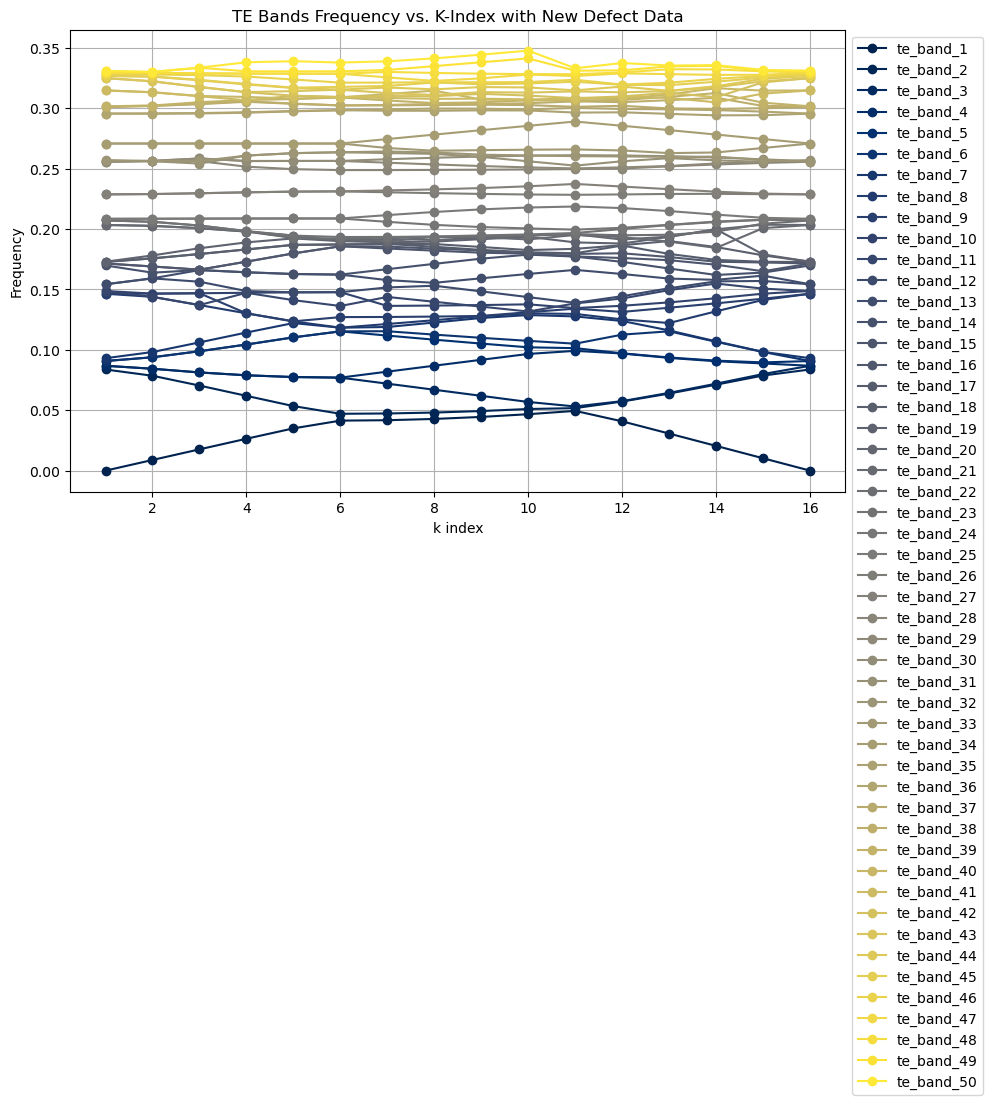

In [30]:
import matplotlib.pyplot as plt
import pandas as pd

data_new_defect = pd.read_csv("target_defect_te.csv")
data_new_defect.columns = data_new_defect.columns.str.strip().str.replace(' ', '_').str.lower()


plt.figure(figsize=(10, 6))
new_defect_te_bands = data_new_defect.filter(like='te_band')
colors = plt.cm.get_cmap('cividis', len(new_defect_te_bands.columns))

k_index_new_defect_te = data_new_defect['k_index']  # Using k-index as the x-axis

for i, column in enumerate(new_defect_te_bands.columns):
    plt.plot(k_index_new_defect_te, new_defect_te_bands[column], label=column, marker='o', linestyle='-', color=colors(i))

plt.xlabel('k index')
plt.ylabel('Frequency')
plt.title('TE Bands Frequency vs. K-Index with New Defect Data')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()
plt.show()